In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🐼 Pandas Worksheet: Exploratory Analysis
---

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive




In [10]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip -P ../00_data/

--2022-07-18 12:01:20--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘../00_data/ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955,28K  1,19MB/s    in 0,8s    

2022-07-18 12:01:22 (1,19 MB/s) - ‘../00_data/ml-latest-small.zip’ saved [978202/978202]



In [12]:
!unzip  -u ../00_data/ml-latest-small.zip -d ../00_data/

Archive:  ../00_data/ml-latest-small.zip
   creating: ../00_data/ml-latest-small/
  inflating: ../00_data/ml-latest-small/links.csv  
  inflating: ../00_data/ml-latest-small/tags.csv  
  inflating: ../00_data/ml-latest-small/ratings.csv  
  inflating: ../00_data/ml-latest-small/README.txt  
  inflating: ../00_data/ml-latest-small/movies.csv  


In [13]:
base_path = '../00_data/ml-latest-small/'
ratings = pd.read_csv(base_path + 'ratings.csv')
movies = pd.read_csv(base_path + 'movies.csv')

---
## Ratings table

#### How many unique users and movies are in the dataset?

In [32]:
ratings.loc[:, ['userId', 'movieId']].apply(lambda x: x.unique().shape)

,userId,movieId
0,610,9724


In [33]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


#### a) What is the average rating, b) which rating appears the most?

In [38]:
from scipy import stats

In [67]:
ratings['rating'].value_counts().index[0]

4.0

In [68]:
def mode_col(x):
    return x.value_counts().index[0]

In [69]:
mode_col(ratings['rating'])

4.0

In [70]:
ratings[['rating']].agg(mean_rating = ('rating', np.mean), mode_rating = ('rating', mode_col))

,rating
mean_rating,3.501557
mode_rating,4.000000


#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [74]:
sum(ratings.rating >= 5) / len(ratings)

0.13101471696616288

In [79]:
print(ratings['rating'].value_counts()/len(ratings))
print(sum(ratings['rating'].value_counts()/len(ratings)))


4.0    0.265957
3.0    0.198808
5.0    0.131015
3.5    0.130271
4.5    0.084801
2.0    0.074884
2.5    0.055040
1.0    0.027877
1.5    0.017762
0.5    0.013586
Name: rating, dtype: float64
0.9999999999999999


#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [95]:
user_rating_counts = ratings.groupby('userId').size()
user_rating_counts

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Length: 610, dtype: int64

#### How many users have rated more than 20 movies?

In [96]:
sum(user_rating_counts > 20)

596

#### a) How many movies rated the user with the most/ least ratings? b) What is the *median* number of ratings?

- use your results from the previous question

In [99]:
user_rating_counts.min(), user_rating_counts.max(), np.median(user_rating_counts)


(20, 2698, 70.5)

#### Draw a histogram or density plot of the distribution of the number of ratings per user! How would you characterize the distribution?

- use your results from the previous question
- Hint: `sns.histplot()`

<AxesSubplot:ylabel='Count'>

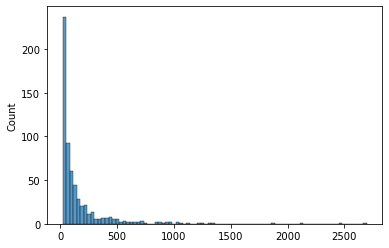

In [100]:
sns.histplot(user_rating_counts)

Skewed, non-norma, perhaps possion or log-normal

<AxesSubplot:ylabel='Count'>

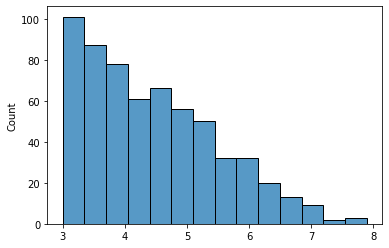

In [101]:
sns.histplot(np.log(user_rating_counts))

#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [128]:
mean_ratings = ratings.groupby('userId').aggregate(mean_rating = ('rating', np.mean))
mean_ratings

,mean_rating
userId,
1,4.366379
2,3.948276
3,2.435897
4,3.555556
5,3.636364
...,...
606,3.657399
607,3.786096
608,3.134176


#### Which user gave the worst ratings on average, which user gave the best ratings?

- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

In [126]:
user_rating_counts.sort_values().index.values[[0, -1]]

array([442, 414])

In [130]:
mean_ratings.loc[user_rating_counts.sort_values().index.values[[0, -1]], ]


,mean_rating
userId,
442,1.275000
414,3.391957


In [118]:
sum(user_rating_counts < 20)

0

In [116]:
user_rating_counts[user_rating_counts < 20]

Series([], dtype: int64)

#### Plot the distribution of average ratings!

<AxesSubplot:ylabel='Count'>

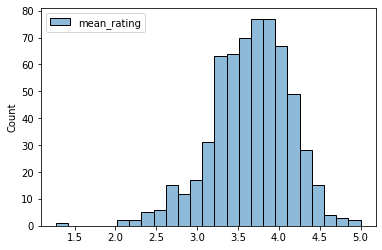

In [131]:
sns.histplot(mean_ratings)

#### ⭐*Bonus*: Are users who have given more ratings also stricter?

- Derive the correlation between the average rating and the number of ratings per user!

In [135]:
mean_ratings_full = ratings.groupby('userId').aggregate(mean_rating = ('rating', np.mean), n_ratings = ('rating', lambda x: x.size))


In [136]:
mean_ratings_full

,mean_rating,n_ratings
userId,,
1,4.366379,232
2,3.948276,29
3,2.435897,39
4,3.555556,216
5,3.636364,44
...,...,...
606,3.657399,1115
607,3.786096,187
608,3.134176,831


<AxesSubplot:xlabel='n_ratings', ylabel='mean_rating'>

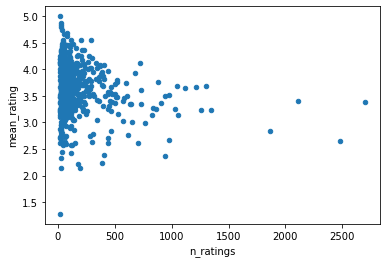

In [138]:
mean_ratings_full.plot(kind = 'scatter', x = 'n_ratings', y = 'mean_rating')

--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [139]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [143]:
f'There are {sum(movies["title"].duplicated())} duplicate movie titles'

'There are 5 duplicate movie titles'

#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [147]:
sum(movies.movieId.isin(ratings.movieId))

9724

No, it seems not.

#### ⭐Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [150]:
movies.title.str.extract("(\d{4})")

,0
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
9737,2017
9738,2017
9739,2017
9740,2018


#### ⭐Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [172]:
genres = movies.genres.str.split('|').explode().to_frame().reset_index()
genres.rename(columns = {'index' : 'movieId'}, inplace = True)

In [173]:
genres.columns

Index(['movieId', 'genres'], dtype='object')

In [184]:
genres.groupby('movieId').size().sort_values(ascending=False).head(1)

movieId
7441    10
dtype: int64

---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

In [246]:
db_ratings = pd.merge(right = movies, left = ratings, on = 'movieId')
db_ratings.sort_values(by = 'userId').head(50)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12117,1,2389,2.0,964983094,Psycho (1998),Crime|Horror|Thriller
12126,1,2395,5.0,964981093,Rushmore (1998),Comedy|Drama
12182,1,2406,4.0,964982310,Romancing the Stone (1984),Action|Adventure|Comedy|Romance
776,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
12236,1,2414,3.0,964982513,Young Sherlock Holmes (1985),Action|Adventure|Children|Fantasy|Mystery|Thri...
12247,1,2427,5.0,964982242,"Thin Red Line, The (1998)",Action|Drama|War
12282,1,2450,4.0,964982620,Howard the Duck (1986),Adventure|Comedy|Sci-Fi
12298,1,2459,5.0,964983414,"Texas Chainsaw Massacre, The (1974)",Horror
12311,1,2470,5.0,964982588,Crocodile Dundee (1986),Adventure|Comedy


In [253]:
ratings_matrix = pd.pivot(data=db_ratings[['userId', 'movieId', 'rating']], index = ['userId'],  columns=['movieId'], values = 'rating')
ratings_matrix


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ratings_matrix.to_json('../00_data/nmf_ratings_matrix.json')

In [255]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [254]:
movies.movieId.unique().size

9742

In [238]:
db = pd.merge(left = movies, right = ratings, on = 'movieId')
db

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


#### Count the number of ratings per movie title!

In [202]:
db.groupby(['movieId', 'title']) \
    .agg(n_votes = ('rating', lambda x: x.size)) \
    .sort_values(by = 'n_votes', ascending=False)

,,n_votes
movieId,title,
356,Forrest Gump (1994),329
318,"Shawshank Redemption, The (1994)",317
296,Pulp Fiction (1994),307
593,"Silence of the Lambs, The (1991)",279
2571,"Matrix, The (1999)",278
...,...,...
4093,Cop (1988),1
4089,Born in East L.A. (1987),1
58351,City of Men (Cidade dos Homens) (2007),1


#### Use your previous results: What are the top 10 most rated movies in the dataset?

In [203]:
db.groupby(['movieId', 'title']) \
    .agg(n_votes = ('rating', lambda x: x.size)) \
    .sort_values(by = 'n_votes', ascending=False)\
    .head(10)

,,n_votes
movieId,title,
356,Forrest Gump (1994),329
318,"Shawshank Redemption, The (1994)",317
296,Pulp Fiction (1994),307
593,"Silence of the Lambs, The (1991)",279
2571,"Matrix, The (1999)",278
260,Star Wars: Episode IV - A New Hope (1977),251
480,Jurassic Park (1993),238
110,Braveheart (1995),237
589,Terminator 2: Judgment Day (1991),224


#### Calculate the average rating per movie title!

In [205]:
db.groupby(['movieId', 'title']) \
    .agg(mean_rating = ('rating', np.mean))

,,mean_rating
movieId,title,
1,Toy Story (1995),3.920930
2,Jumanji (1995),3.431818
3,Grumpier Old Men (1995),3.259615
4,Waiting to Exhale (1995),2.357143
5,Father of the Bride Part II (1995),3.071429
...,...,...
193581,Black Butler: Book of the Atlantic (2017),4.000000
193583,No Game No Life: Zero (2017),3.500000
193585,Flint (2017),3.500000


#### Make a visualization of the distribution of average ratings per movie

<AxesSubplot:ylabel='Frequency'>

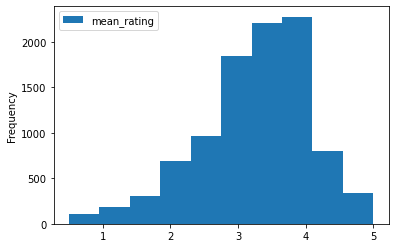

In [209]:
db.groupby(['movieId', 'title']) \
    .agg(mean_rating = ('rating', np.mean)) \
    .plot.hist()

#### Which movie was rated the best? Which movie was rated the worst?


In [235]:
db.groupby(['movieId', 'title']) \
    .agg(
        mean_rating = ('rating', np.mean)) \
    .sort_values(by = 'mean_rating') \
    .iloc[[0,-1], :]

,,mean_rating
movieId,title,
26696,Lionheart (1990),0.5
53355,Sun Alley (Sonnenallee) (1999),5.0



- ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? 

In [236]:
db.groupby(['movieId', 'title']) \
    .agg(
        mean_rating = ('rating', np.mean),
        n_ratings = ('rating', lambda x: x.size)) \
    .groupby(['movieId', 'title']).filter(lambda x: x['n_ratings'] > 30) \
    .sort_values(by = 'mean_rating') \
    .iloc[[0,-1], :]

,,mean_rating,n_ratings
movieId,title,,
1882,Godzilla (1998),1.954545,33
318,"Shawshank Redemption, The (1994)",4.429022,317


<AxesSubplot:ylabel='Frequency'>

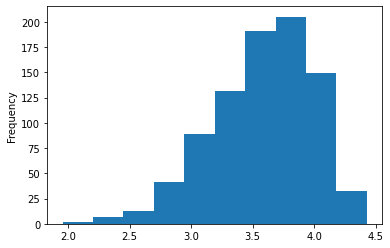

In [226]:
db.groupby(['movieId', 'title']) \
    .agg(
        mean_rating = ('rating', np.mean),
        n_ratings = ('rating', lambda x: x.size)) \
    .groupby(['movieId', 'title']).filter(lambda x: x['n_ratings'] > 30) \
    .mean_rating \
    .plot.hist()

#### ⭐*Bonus*: Did the average rating of movies improve over time? 

- Use your results from the previous ⭐bonus exercises
- Visualize your findings in a nice plot